In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
data = pd.read_csv('rhythm_MPB.csv', keep_default_na = False)
data.head()

,corpus,music,position,r-word
0,BOSCO,1,1,jjb
1,BOSCO,1,2,fsb
2,BOSCO,1,3,jjb
3,BOSCO,1,4,jjbjeb
4,BOSCO,1,5,jjj


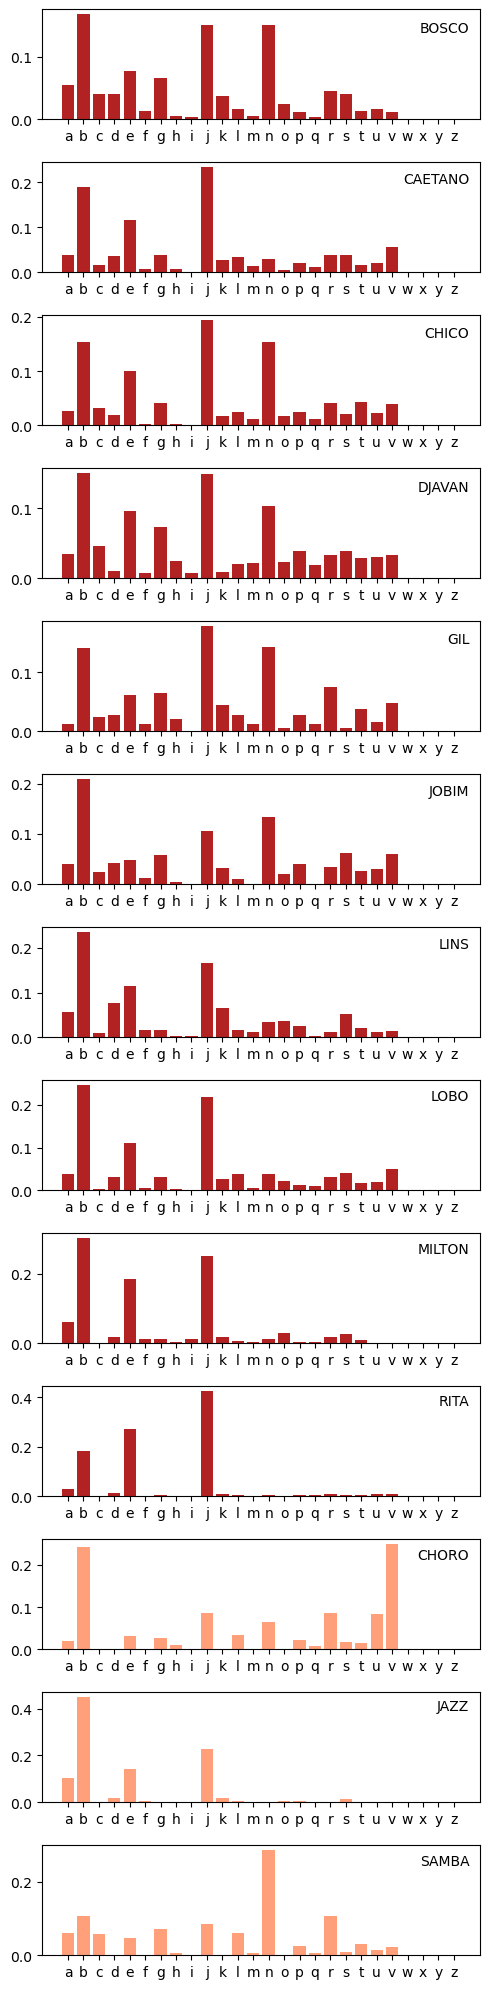

In [4]:
r_letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

r_count = {}

for corpus in data['corpus'].unique():
    r_counter = Counter(''.join(list(data[data['corpus'] == corpus]['r-word'])))

    for r_letter in r_letters:
        if r_letter not in r_counter:
            r_counter[r_letter] = 0
    
    r_count[corpus] = {}
    for r_letter in r_letters:
        r_count[corpus][r_letter] = r_counter[r_letter]

plt.figure(figsize = (5, 20))

sub = 1
for corpus in [c for c in list(r_count.keys()) if c not in ['CHORO', 'JAZZ', 'SAMBA']]:
    plt.subplot(13, 1, sub)
    r_letters_prop = np.array(list(r_count[corpus].values()))/np.array(list(r_count[corpus].values())).sum()
    plt.bar(x = r_letters, height = r_letters_prop, color = 'firebrick')
    plt.text(x = 26, y = max(r_letters_prop) - 0.01, s = corpus, ha = 'right', va = 'top')
    sub += 1

for corpus in ['CHORO', 'JAZZ', 'SAMBA']:
    plt.subplot(13, 1, sub)
    r_letters_prop = np.array(list(r_count[corpus].values()))/np.array(list(r_count[corpus].values())).sum()
    plt.bar(x = r_letters, height = r_letters_prop, color = 'lightsalmon')
    plt.text(x = 26, y = max(r_letters_prop) - 0.01, s = corpus, ha = 'right', va = 'top')
    sub += 1

plt.tight_layout()

# plt.savefig('hists.pdf', format  = 'pdf', dpi = 300, bbox_inches = 'tight')

C:\Users\hugom\AppData\Local\Temp\ipykernel_10328\601097361.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  kl_r_letras[corpus_2][corpus_1] = kl(x, y)


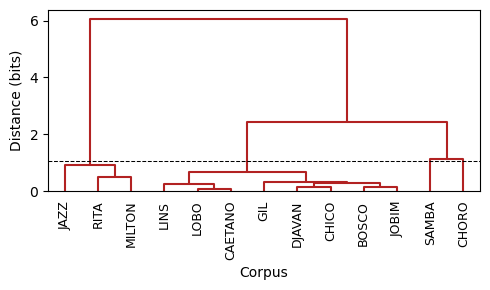

In [4]:
def kl(x, y):
    return (x*np.log2(x/y)).sum()

corpora = [c for c in list(r_count.keys()) if c not in ['CHORO', 'JAZZ', 'SAMBA']] + ['CHORO', 'JAZZ', 'SAMBA']
kl_r_letras = pd.DataFrame(columns = corpora, index = corpora)

for corpus_1 in corpora:
    for corpus_2 in corpora:
        x = np.array(list(r_count[corpus_1].values()))/np.array(list(r_count[corpus_1].values())).sum() + 1e-10
        y = np.array(list(r_count[corpus_2].values()))/np.array(list(r_count[corpus_2].values())).sum() + 1e-10
        kl_r_letras[corpus_2][corpus_1] = kl(x, y)

kl_r_letras_symm = 0.5 * (kl_r_letras + kl_r_letras.T)
kl_r_letras_symm_vec = squareform(kl_r_letras_symm)

Z = linkage(kl_r_letras_symm_vec, method = 'ward', optimal_ordering = True)

plt.figure(figsize = (5, 3))

dendrogram(Z, labels = corpora, color_threshold = 0, above_threshold_color = 'firebrick')
# plt.title('Hierarchical clustering Clusterização hierárquica (ritmo e melodia)')
plt.xlabel('Corpus')
plt.ylabel('Distance (bits)')

plt.xticks(rotation = 90, fontsize = 9)

plt.axhline(y = 1.05, color='k', linestyle='--', linewidth = 0.75)

plt.tight_layout()

# plt.savefig("dend.pdf", format  = 'pdf', dpi = 300, bbox_inches = 'tight')

plt.show()